# Naive Bayes - Utkarsh Gaikwad

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X,Y  = load_iris(return_X_y=True)

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

In [6]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)

GaussianNB()

In [7]:
ypred_test = gnb.predict(xtest)
ypred_test

array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       1])

<AxesSubplot: >

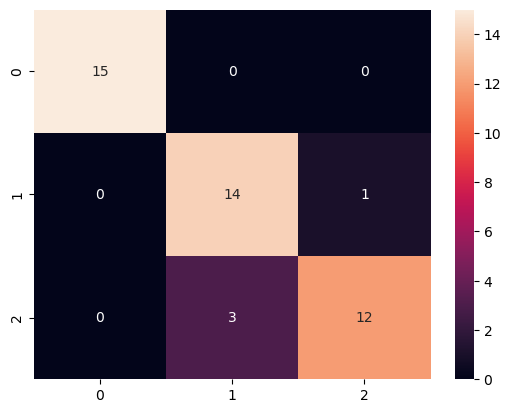

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest, ypred_test)
sns.heatmap(cf,annot=True,fmt='d')

In [9]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.87        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



# Tips dataset analysis

In [10]:
import seaborn as sns
df = sns.load_dataset('tips')

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
X = df.drop(labels=['time'],axis=1)
Y = df[['time']]

In [13]:
X.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
size             int64
dtype: object

In [14]:
import pandas as pd
X_cat = pd.get_dummies(X.select_dtypes(include='category'))
X_cat.head()

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun
0,0,1,0,1,0,0,0,1
1,1,0,0,1,0,0,0,1
2,1,0,0,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,1,0,1,0,0,0,1


In [15]:
X_con = X.select_dtypes(exclude='category')
X_con.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [16]:
Xnew = pd.concat([X_con,X_cat],axis=1)
Xnew.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,2,0,1,0,1,0,0,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = pd.DataFrame(le.fit_transform(Y.values.flatten()),columns=Y.columns)

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew,Y,test_size=0.3,random_state=42,stratify=Y)

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb1 = GaussianNB()
gnb1.fit(xtrain,ytrain.values.flatten())

GaussianNB()

In [25]:
ypred_test = gnb1.predict(xtest)

In [26]:
ypred_test

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0])

<AxesSubplot: >

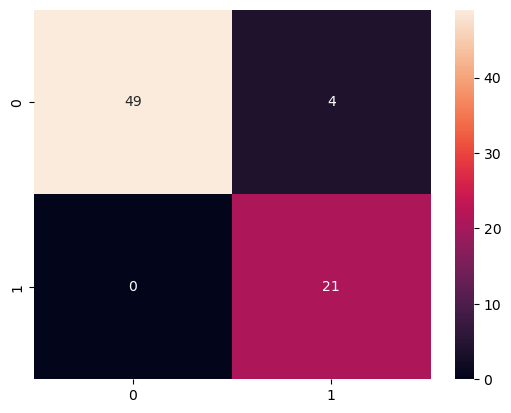

In [27]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest, ypred_test)
sns.heatmap(cf,annot=True,fmt='d')

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        53
           1       0.84      1.00      0.91        21

    accuracy                           0.95        74
   macro avg       0.92      0.96      0.94        74
weighted avg       0.95      0.95      0.95        74

